<a href="https://colab.research.google.com/github/Parente169/Estat5st5ca-python/blob/main/pesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data <- read_excel("pesquisa.xlsx")


In [ ]:
head(data)


TURMA,DISCIPLINA,PERÍODO,SEXO,PESQ1,PESQ2
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
T126,ALG-I,1P,1,0,NA
T126,ALG-I,1P,1,0,NA
T126,ALG-I,1P,1,P,P
T126,ALG-I,1P,1,0,NA
T126,ALG-I,1P,1,H,H
T126,ALG-I,1P,1,0,NA


In [ ]:
data <- data %>%
  mutate(
    DIA_SEMANA = substr(TURMA, 3, 3),
    TURNO = substr(TURMA, 4, 4)
  )

In [ ]:
data <- data %>%
  mutate(
    DIA_SEMANA = case_when(
      DIA_SEMANA == "2" ~ "2ª feira",
      DIA_SEMANA == "3" ~ "3ª feira",
      DIA_SEMANA == "4" ~ "4ª feira",
      DIA_SEMANA == "5" ~ "5ª feira",
      DIA_SEMANA == "6" ~ "6ª feira",
      TRUE ~ DIA_SEMANA
    ),
    TURNO = case_when(
      TURNO == "1" ~ "1º tempo noite",
      TURNO == "2" ~ "2º tempo noite",
      TURNO == "3" ~ "3º tempo noite",
      TRUE ~ TURNO
    )
  )


In [ ]:
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
data %>%
  gather(key = "PESQUISA_TIPO", value = "PREFERENCIA", PESQ1:PESQ2) %>%
  filter(PREFERENCIA != "0") %>%
  group_by(PREFERENCIA) %>%
  summarise(QUANTIDADE = n())


PREFERENCIA,QUANTIDADE
<chr>,<int>
H,166
P,104
R,298


In [ ]:
data %>%
  gather(key = "PESQUISA_TIPO", value = "PREFERENCIA", PESQ1:PESQ2) %>%
  filter(PREFERENCIA != "0") %>%
  group_by(PREFERENCIA) %>%
  summarise(QUANTIDADE = n())

PREFERENCIA,QUANTIDADE
<chr>,<int>
H,166
P,104
R,298


In [ ]:
preferencias_sexo <- data %>%
  gather(key = "PESQUISA_TIPO", value = "PREFERENCIA", PESQ1:PESQ2) %>%
  filter(PREFERENCIA != "0") %>%
  group_by(SEXO, PREFERENCIA) %>%
  summarise(QUANTIDADE = n())

`summarise()` has grouped output by 'SEXO'. You can override using the
`.groups` argument.


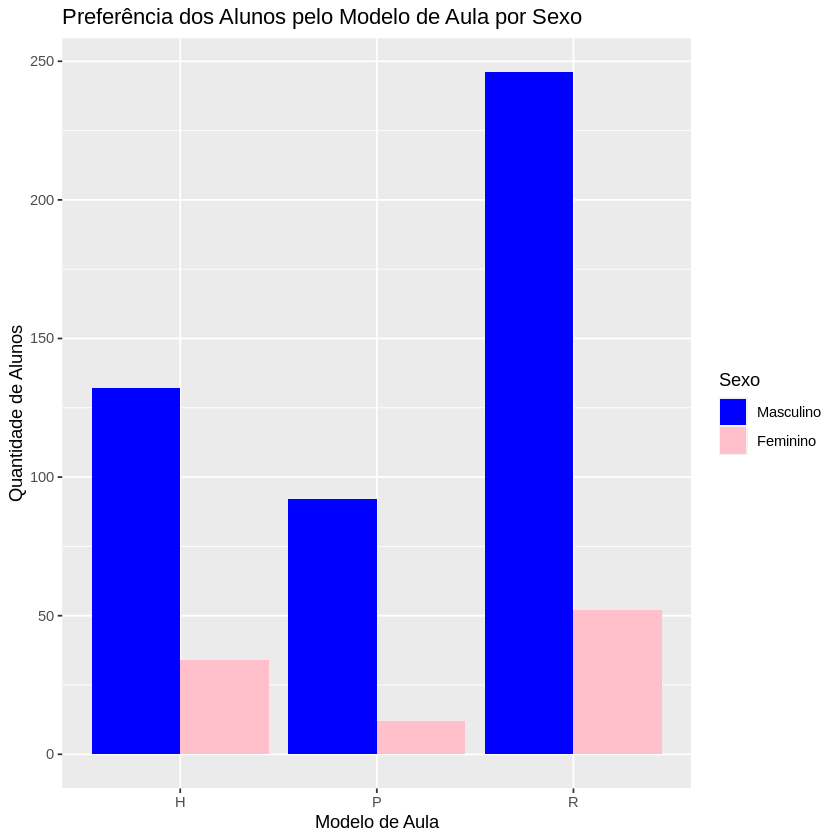

In [ ]:
ggplot(preferencias_sexo, aes(x = PREFERENCIA, y = QUANTIDADE, fill = as.factor(SEXO))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Preferência dos Alunos pelo Modelo de Aula por Sexo",
       x = "Modelo de Aula",
       y = "Quantidade de Alunos",
       fill = "Sexo") +
  scale_fill_manual(values = c("1" = "blue", "2" = "pink"),
                    labels = c("1" = "Masculino", "2" = "Feminino"))


In [ ]:
preferencias_dia <- data %>%
  gather(key = "PESQUISA_TIPO", value = "PREFERENCIA", PESQ1:PESQ2) %>%
  filter(PREFERENCIA != "0") %>%
  group_by(DIA_SEMANA, PREFERENCIA) %>%
  summarise(QUANTIDADE = n())

`summarise()` has grouped output by 'DIA_SEMANA'. You can override using the
`.groups` argument.


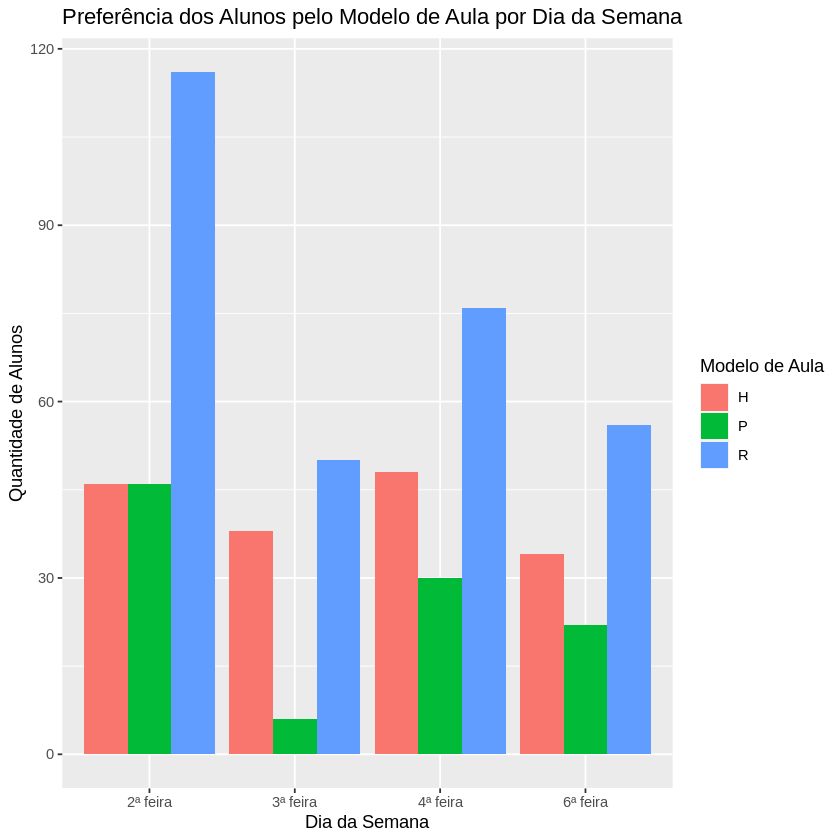

In [ ]:
ggplot(preferencias_dia, aes(x = DIA_SEMANA, y = QUANTIDADE, fill = PREFERENCIA)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Preferência dos Alunos pelo Modelo de Aula por Dia da Semana",
       x = "Dia da Semana",
       y = "Quantidade de Alunos",
       fill = "Modelo de Aula")

In [ ]:
ggplot(preferencias, aes(x = PREFERENCIA, y = QUANTIDADE)) +
  geom_bar(stat = "identity") +
  labs(title = "Preferência dos Alunos pelo Modelo de Aula",
       x = "Modelo de Aula",
       y = "Quantidade de Alunos") +
  theme_minimal()

ERROR: Error in eval(expr, envir, enclos): object 'preferencias' not found
